In [14]:
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv("rawdata.csv")
df.head(5)

,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Rating,Review,Reviewer Name,Review Upvotes,Review Downvotes,Verified Purchaser,Recommended Purchase,Review Date,Five Star,Four Star,Three Star,Two Star,One Star
0,1800878dcfa5255c691f2a87ce8b2869,2020-05-16 17:58:33 +0000,https://www.walmart.com/reviews/product/36907838,walmart.com,NaN,1.0,One star for looking nice. That’s it. After tr...,PJ10,0,0,No,No,7/28/2018,23.0,5.0,1.0,3.0,6.0
1,ac06ca1b77310d539c9a74eed7a8a8e2,2020-04-17 01:05:43 +0000,https://www.walmart.com/reviews/product/708236785,walmart.com,NaN,4.0,Love this phone so far have had it almost a mo...,KelJo,9,3,No,No,11/14/2017,91.0,23.0,13.0,9.0,31.0
2,9c4b10fff4e5e2cc7e2e1bbed76e2220,2020-06-08 10:35:05 +0000,https://www.walmart.com/reviews/product/831078728,walmart.com,NaN,4.0,This TV is absolutely fantastic. This is my th...,TheBigChalupa11,0,0,Yes,No,5/20/2020,32.0,8.0,1.0,0.0,0.0
3,b5a5dc8de9fc0468aab961f097b56091,2020-04-13 03:57:29 +0000,https://www.walmart.com/reviews/product/40712755,walmart.com,NaN,5.0,"Refurb, good shape, good price, does what I wa...",Micalic,0,0,No,No,7/9/2019,418.0,62.0,17.0,1.0,13.0
4,430433b52b882e540c16363d448e012b,2020-05-19 03:52:42 +0000,https://www.walmart.com/reviews/product/46597970,walmart.com,NaN,5.0,Very nice tablet! Looks brand new. Fired right...,jcan74,0,0,No,No,2/11/2020,213.0,57.0,25.0,24.0,87.0


In [16]:
# drop all the columns except for Review and Rating
df = df.drop(columns=["Uniq Id", "Crawl Timestamp", "Pageurl", "Website",
                       "Title", "Reviewer Name", "Review Upvotes", "Review Downvotes",
                         "Verified Purchaser", "Recommended Purchase", "Review Date",
                           "Five Star", "Four Star", "Three Star", "Two Star", "One Star"])

In [17]:
df.head()

,Rating,Review
0,1.0,One star for looking nice. That’s it. After tr...
1,4.0,Love this phone so far have had it almost a mo...
2,4.0,This TV is absolutely fantastic. This is my th...
3,5.0,"Refurb, good shape, good price, does what I wa..."
4,5.0,Very nice tablet! Looks brand new. Fired right...


In [18]:
df = df.dropna()
print(df.isnull().sum())


Rating    0
Review    0
dtype: int64


In [19]:
df = df.drop_duplicates(subset=["Review"])
print(df.duplicated().sum())


0


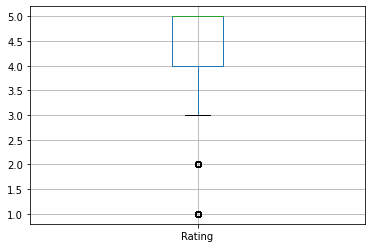

In [20]:
df.boxplot(column=["Rating"])
plt.show()

In [21]:
# For this example, I will use the spellchecker library to check and correct the spelling errors in each review
# from spellchecker import SpellChecker

# spell = SpellChecker()
# def correct_spelling(text):  
#   # split the text into words
#   words = text.split()
#   # loop through each word and correct it if it is misspelled
#   corrected_words = []
#   for word in words:
#     corrected_word = spell.correction(word)

#     #to keep the original word if it is correct:
#     if corrected_word is None:
#       corrected_word = word 

#     corrected_words.append(corrected_word)
#   # join the corrected words back into a text
#   corrected_text = " ".join(corrected_words)
#   return corrected_text


##it is taking so much time to run so we skip it as it is not necessary


In [22]:

# Remove outliers based on some criteria ( rating below 1 or above 5)
df = df[(df["Rating"] >= 1) & (df["Rating"] <= 5)]

In [23]:
 #Handle categorical variables
print(df["Rating"].value_counts()) # check the frequency of each category

Rating
5.0    15011
4.0     3875
1.0     2970
3.0     1500
2.0     1132
Name: count, dtype: int64


In [24]:
print(df["Rating"].mean()) # check the mean of rating column

4.095434498529892


In [25]:
print(df["Rating"].std()) # check the standard deviation of rating column


1.3934425355085853


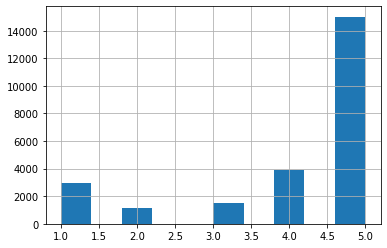

In [26]:
df["Rating"].hist() # plot a histogram of rating column
plt.show() # show the plot


In [29]:
df.to_csv('cleandata.csv', index=False)